# Projekt Week 03 - Bike Share Demand

## Buisness Goal

#### Predict the total count of bikes rented during each hour 

## Import

In [404]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (15, 8)

## Read Data

In [405]:
data_train = pd.read_csv('data/bike-share-demand/train.csv', parse_dates=True, index_col=0)

In [406]:
data_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [407]:
data_train.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


* *datetime* - hourly date + timestamp  
* *season* -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* *holiday* - whether the day is considered a holiday
* *workingday* - whether the day is neither a weekend nor holiday
* *weather* 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* *temp* - temperature in Celsius
* *atemp* - "feels like" temperature in Celsius
* *humidity* - relative humidity
* *windspeed* - wind speed
* *casual* - number of non-registered user rentals initiated
* *registered* - number of registered user rentals initiated
* *count* - number of total rentals **(y value)**

In [408]:
### y-value = 'count' column

## Train-Test-Split

#### Test data is in seperate file test.csv 

In [409]:
X_train = data_train.drop(['count', 'casual', 'registered'], axis=1)
y_train = data_train['count']

###  Transform target column to  ylog

In [410]:
y_train_log = np.log1p(y_train)

## EDA

In [411]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [412]:
data_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


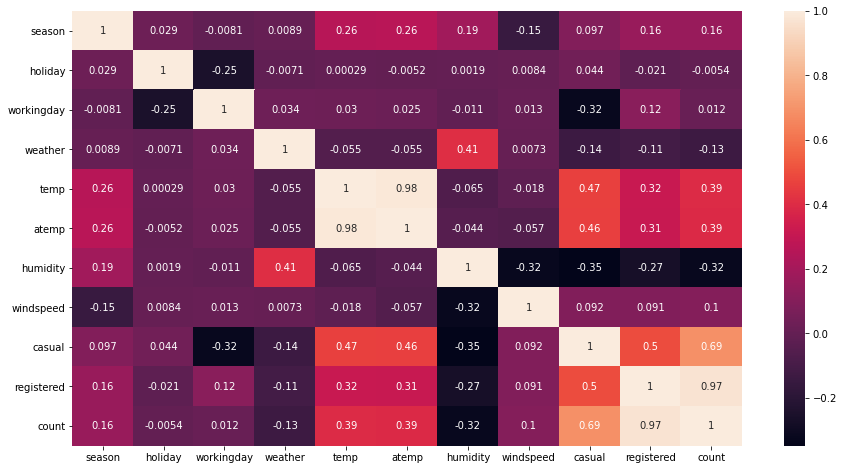

In [413]:
sns.heatmap(data_train.corr(), annot=True)

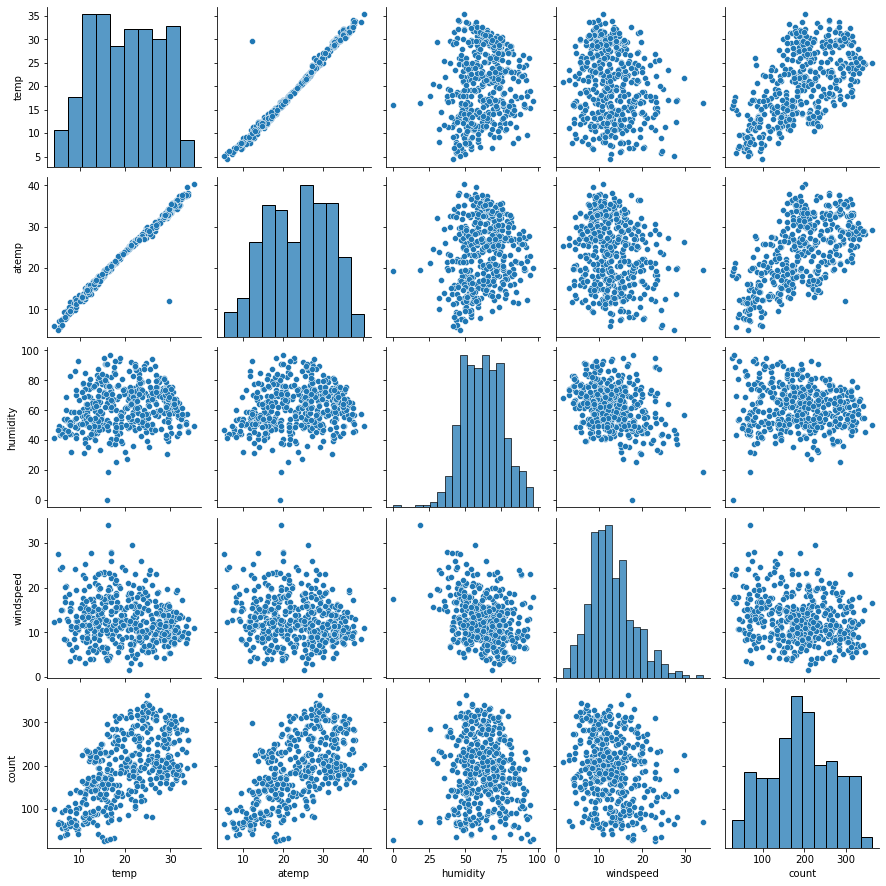

In [414]:
sns.pairplot(data= data_train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].resample('D').mean())

In [415]:
def extract_date_info(df):
    
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['weekday'] = df.index.day_name()
    df['hour'] = df.index.hour

In [416]:
extract_date_info(data_train)

In [417]:
data_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,weekday,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,Saturday,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,Saturday,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,Saturday,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,Saturday,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,Saturday,4


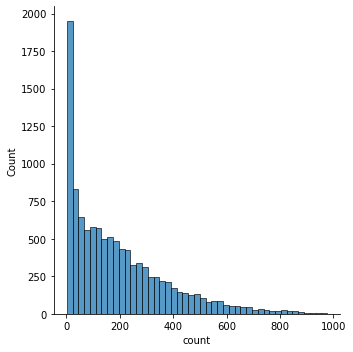

In [418]:
sns.displot(x='count', data=data_train)

<ipython-input-419-f89034c12e64>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_train.groupby('season')['casual', 'registered'].mean().plot(kind='bar')


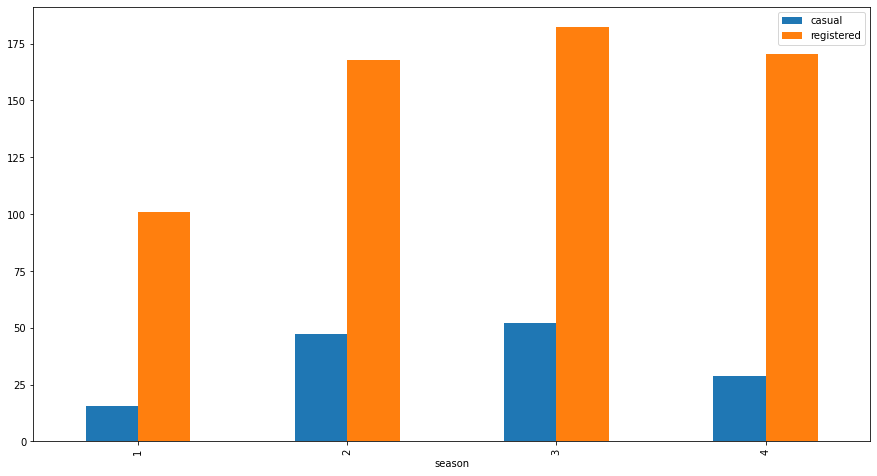

In [419]:
data_train.groupby('season')['casual', 'registered'].mean().plot(kind='bar')

<ipython-input-420-d106ed7db25d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_train.groupby('hour')['casual', 'registered'].mean().plot(kind='bar')


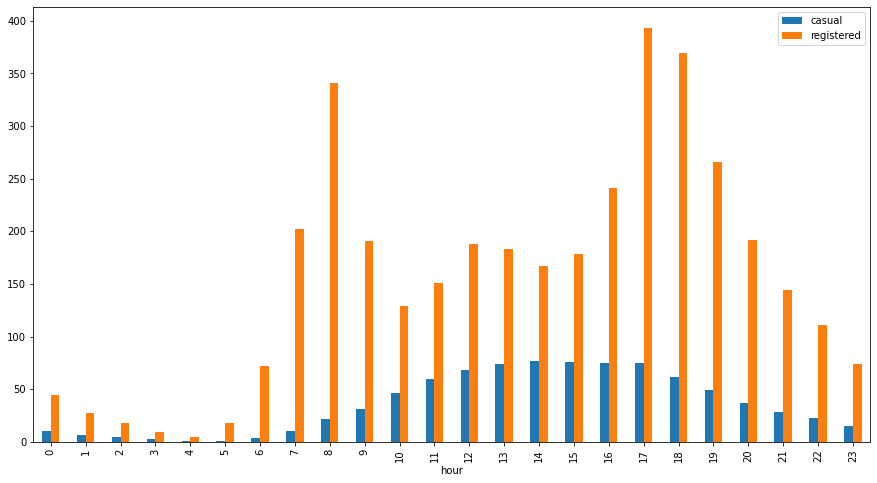

In [420]:
data_train.groupby('hour')['casual', 'registered'].mean().plot(kind='bar')

<ipython-input-421-4ca27a9beb95>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_train.groupby('weekday')['casual', 'registered'].mean().plot(kind='bar')


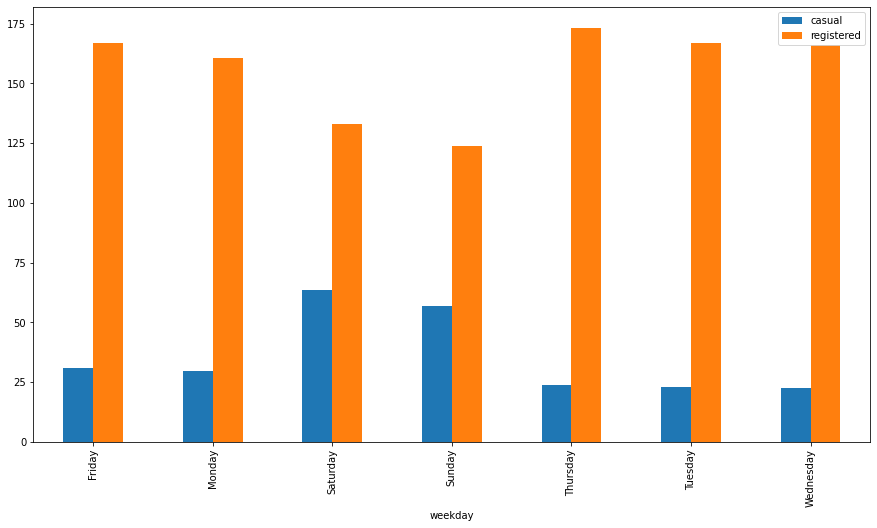

In [421]:
data_train.groupby('weekday')['casual', 'registered'].mean().plot(kind='bar')

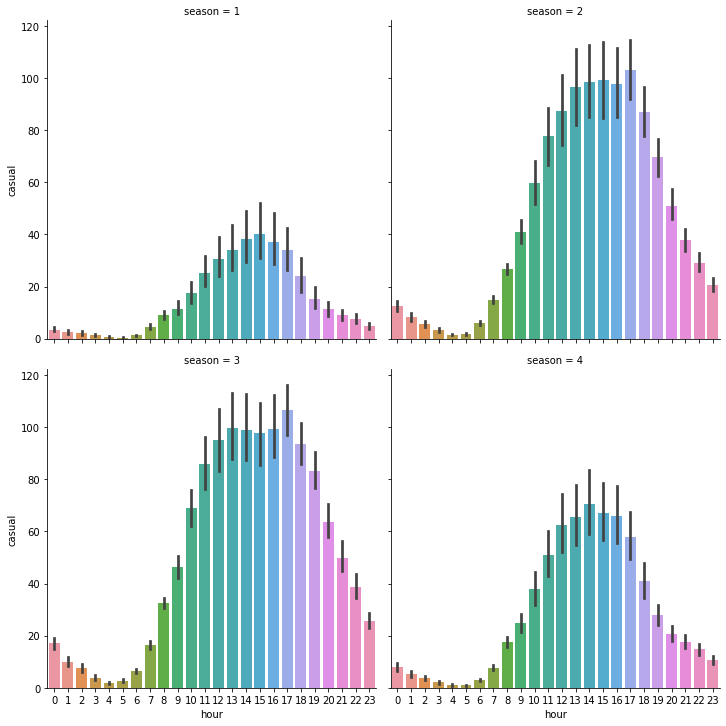

In [422]:
sns.catplot(x='hour', y='casual', data=data_train, col='season', col_wrap=2, kind='bar')
#sns.relplot(x='hour', y='registered', data=X_train, row='season')

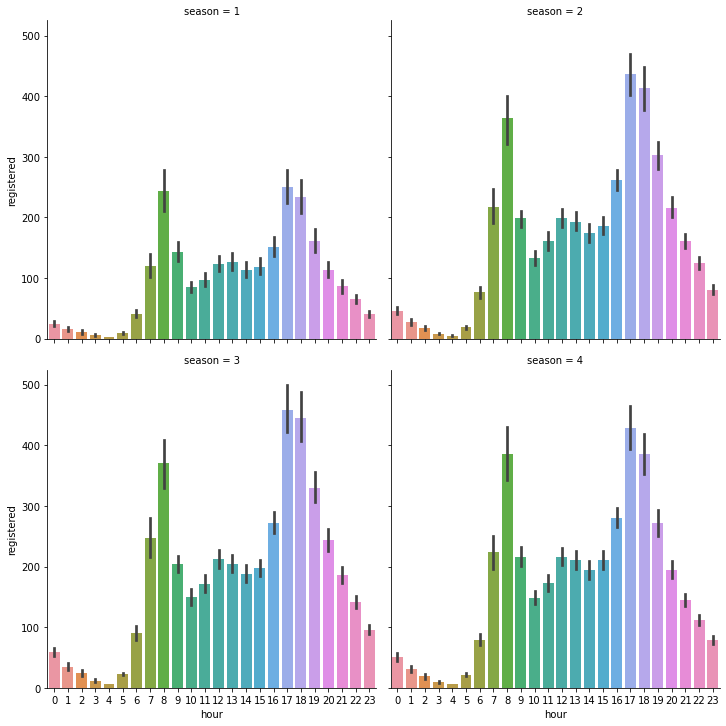

In [423]:
sns.catplot(x='hour', y='registered', data=data_train, col='season', col_wrap=2, kind='bar')

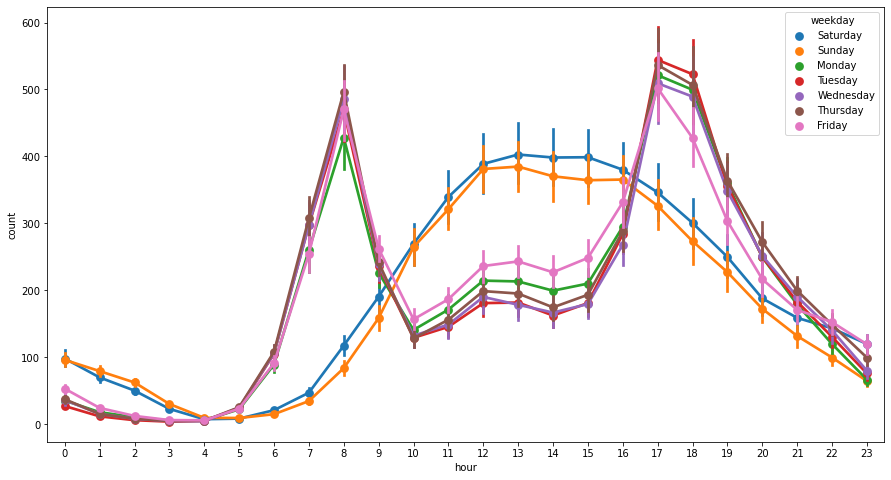

In [424]:
sns.pointplot(x='hour', y='count', data=data_train, hue='weekday')

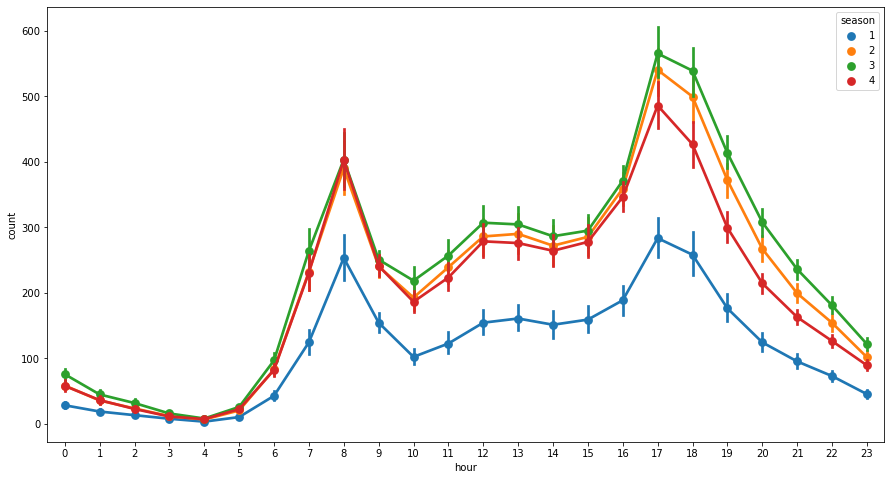

In [425]:
sns.pointplot(x='hour', y='count', data=data_train, hue='season')

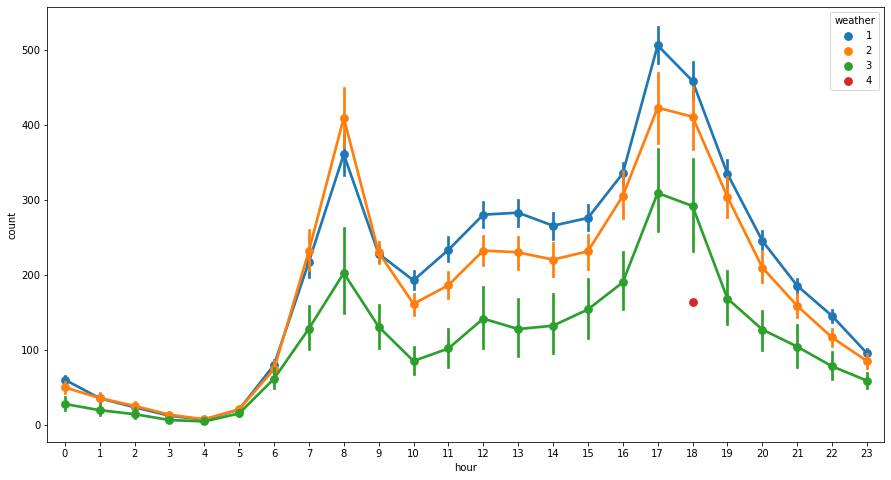

In [426]:
sns.pointplot(x='hour', y='count', data=data_train, hue='weather')

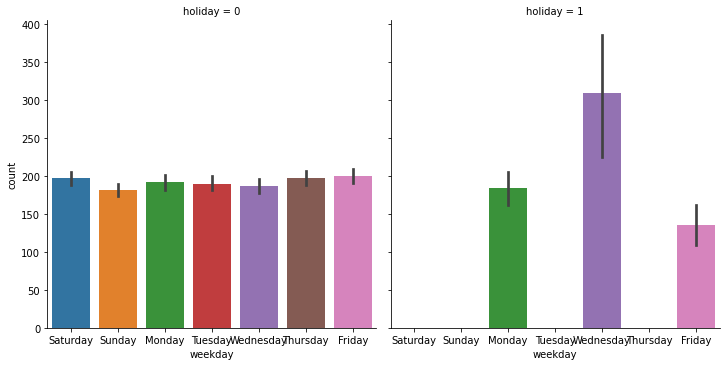

In [427]:
sns.catplot(x='weekday', y='count', data=data_train, col='holiday', col_wrap=2, kind='bar')

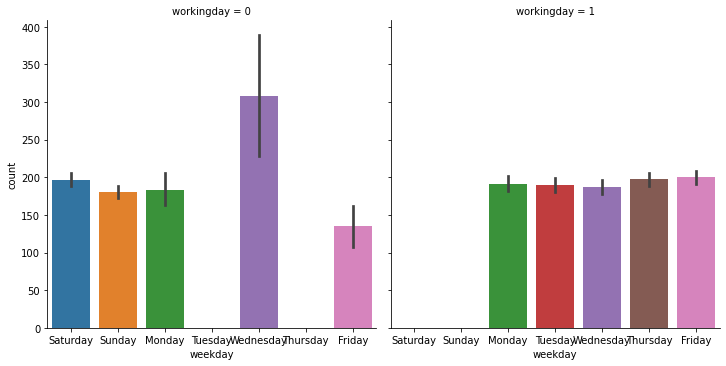

In [428]:
sns.catplot(x='weekday', y='count', data=data_train, col='workingday', col_wrap=2, kind='bar')

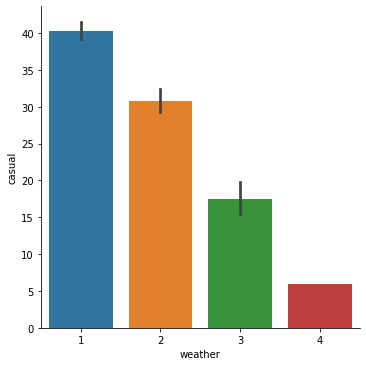

In [429]:
sns.catplot(x='weather', y='casual', data=data_train, kind='bar')

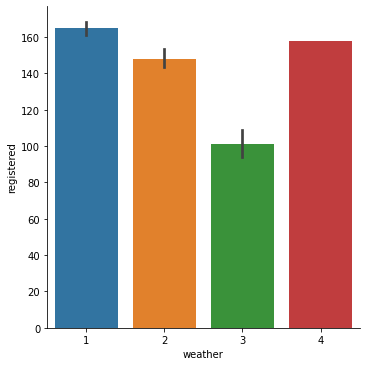

In [430]:
sns.catplot(x='weather', y='registered', data=data_train, kind='bar')

In [431]:
data_train[data_train['weather'] == 4]  ## outlier possibly drop

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,weekday,hour
datetime,,,,,,,,,,,,,,,
2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,1,9,Monday,18


Text(0.5, 1.0, 'bike counts vs humidity on daily basis')

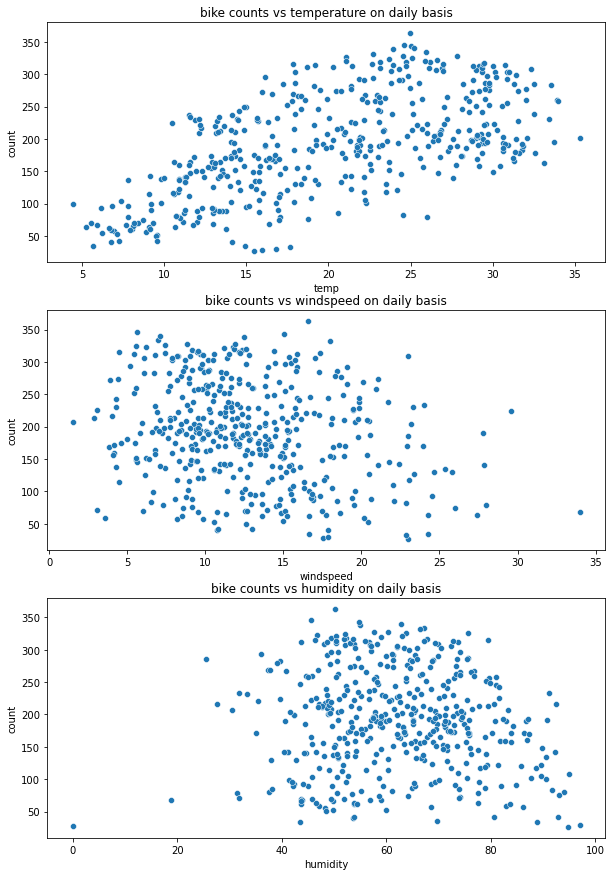

In [432]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharey=True)

sns.scatterplot(ax=ax[0], x='temp', y='count', data=data_train.resample('D').mean())
sns.scatterplot(ax=ax[1], x='windspeed', y='count', data=data_train.resample('D').mean())
sns.scatterplot(ax=ax[2], x='humidity', y='count', data=data_train.resample('D').mean())

ax[0].set_title('bike counts vs temperature on daily basis')
ax[1].set_title('bike counts vs windspeed on daily basis')
ax[2].set_title('bike counts vs humidity on daily basis')

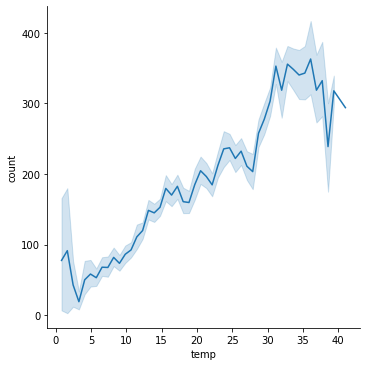

In [433]:
sns.relplot(x='temp', y='count', data=data_train, kind='line')

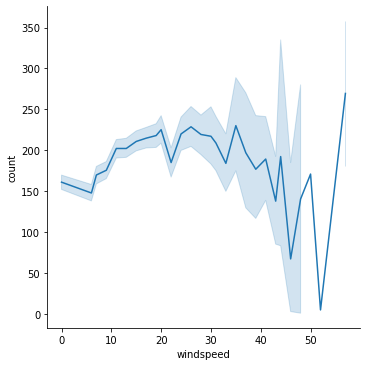

In [434]:
sns.relplot(x='windspeed', y='count', data=data_train, kind='line')

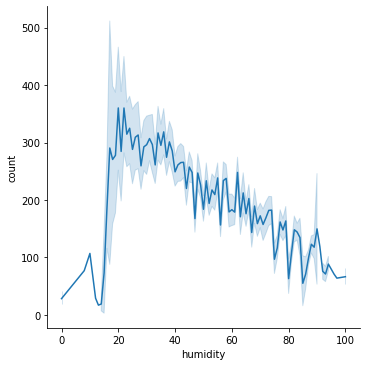

In [435]:
sns.relplot(x='humidity', y='count', data=data_train, kind='line')

#### Outlier in humidity broken sensor?

In [436]:
data_train[data_train['humidity'] < 1].head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,weekday,hour
datetime,,,,,,,,,,,,,,,
2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3,3,10,Thursday,0
2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,2,2,3,10,Thursday,1
2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,1,1,3,10,Thursday,2
2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,1,2,3,3,10,Thursday,5
2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,0,12,12,3,10,Thursday,6


In [437]:
adj_hum =  data_train['humidity'].replace(to_replace=0, value=np.mean([data_train.loc['2011-03-09']['humidity'].mean(), data_train.loc['2011-03-11']['humidity'].mean()]))

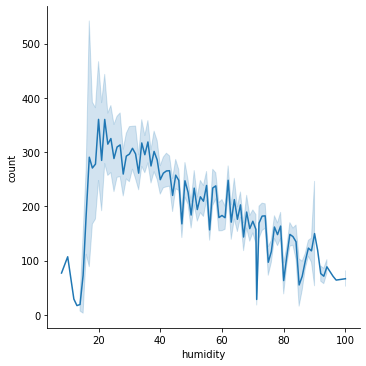

In [438]:
sns.relplot(x=adj_hum, y=data_train['count'], kind='line')

In [439]:
data_train['humidity'].replace(to_replace=0, 
                               value=np.mean([data_train.loc['2011-03-09']['humidity'].mean(), 
                                              data_train.loc['2011-03-11']['humidity'].mean()]), 
                               inplace=True)

/Users/marf/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


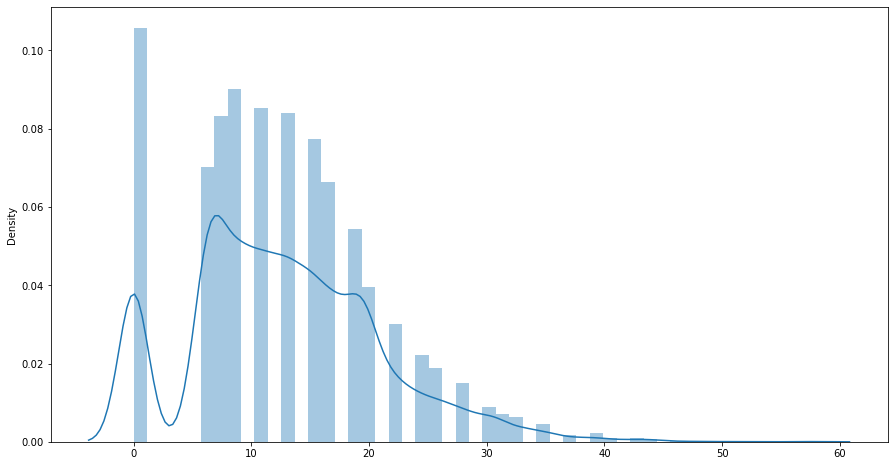

In [440]:
sns.distplot(x=data_train['windspeed'])

In [441]:
data_train['windbins'] = pd.cut(data_train['windspeed'], bins=5)

In [442]:
data_train['windbins'].head()

datetime
2011-01-01 00:00:00    (-0.057, 11.399]
2011-01-01 01:00:00    (-0.057, 11.399]
2011-01-01 02:00:00    (-0.057, 11.399]
2011-01-01 03:00:00    (-0.057, 11.399]
2011-01-01 04:00:00    (-0.057, 11.399]
Name: windbins, dtype: category
Categories (5, interval[float64]): [(-0.057, 11.399] < (11.399, 22.799] < (22.799, 34.198] < (34.198, 45.598] < (45.598, 56.997]]

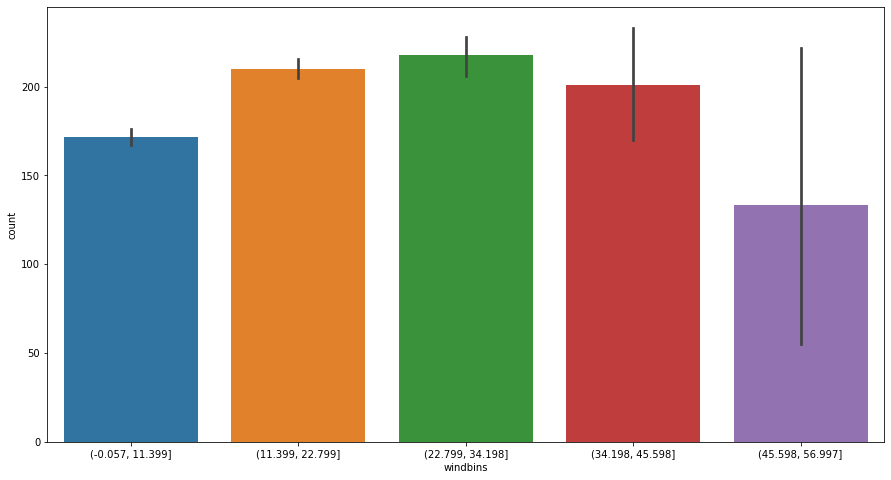

In [443]:
sns.barplot(x='windbins', y='count', data=data_train)

/Users/marf/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


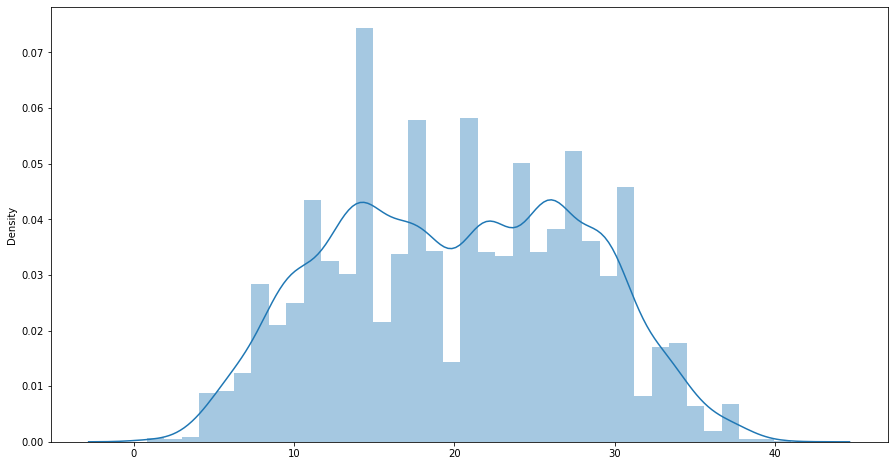

In [444]:
sns.distplot(x=data_train['temp'])

In [445]:
data_train['tempbins'] = pd.cut(data_train['temp'], bins=10)

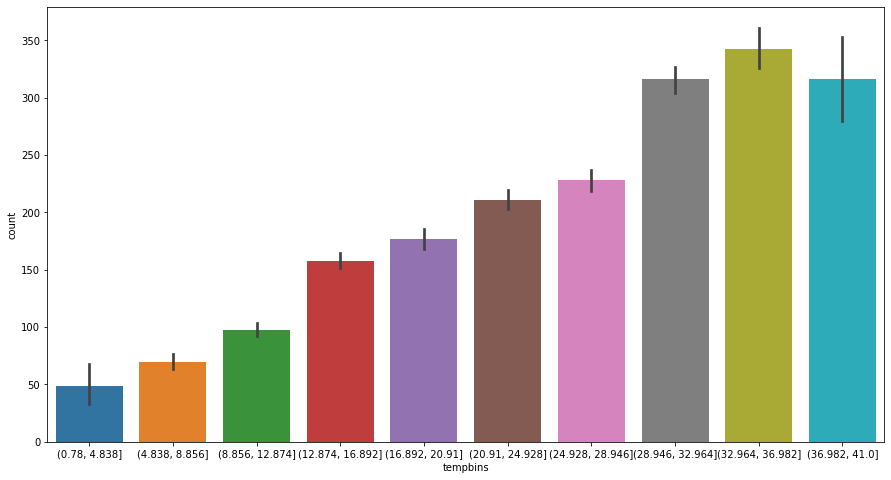

In [446]:
sns.barplot(x='tempbins', y='count', data=data_train)

In [447]:
data_train[data_train['temp'] > 37]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,weekday,hour,windbins,tempbins
datetime,,,,,,,,,,,,,,,,,
2011-06-08 14:00:00,2,0,1,1,37.72,43.940,40.0,16.9979,44,111,155,6,8,Wednesday,14,"(11.399, 22.799]","(36.982, 41.0]"
2011-06-08 15:00:00,2,0,1,1,37.72,43.940,40.0,11.0014,28,100,128,6,8,Wednesday,15,"(-0.057, 11.399]","(36.982, 41.0]"
2011-06-08 16:00:00,2,0,1,1,37.72,43.940,40.0,15.0013,34,199,233,6,8,Wednesday,16,"(11.399, 22.799]","(36.982, 41.0]"
2011-06-08 17:00:00,2,0,1,1,37.72,42.425,35.0,15.0013,80,426,506,6,8,Wednesday,17,"(11.399, 22.799]","(36.982, 41.0]"
2011-06-09 12:00:00,2,0,1,1,37.72,42.425,35.0,12.9980,40,100,140,6,9,Thursday,12,"(11.399, 22.799]","(36.982, 41.0]"
2011-06-09 14:00:00,2,0,1,1,37.72,43.940,40.0,12.9980,25,93,118,6,9,Thursday,14,"(11.399, 22.799]","(36.982, 41.0]"
2011-06-09 15:00:00,2,0,1,1,38.54,41.665,31.0,11.0014,18,86,104,6,9,Thursday,15,"(-0.057, 11.399]","(36.982, 41.0]"
2011-06-09 16:00:00,2,0,1,1,37.72,41.665,33.0,8.9981,30,170,200,6,9,Thursday,16,"(-0.057, 11.399]","(36.982, 41.0]"
2011-08-01 14:00:00,3,0,1,1,37.72,40.910,29.0,12.9980,37,86,123,8,1,Monday,14,"(11.399, 22.799]","(36.982, 41.0]"


In [448]:
data_train['humiditybins'] = pd.cut(data_train['humidity'], bins=5)

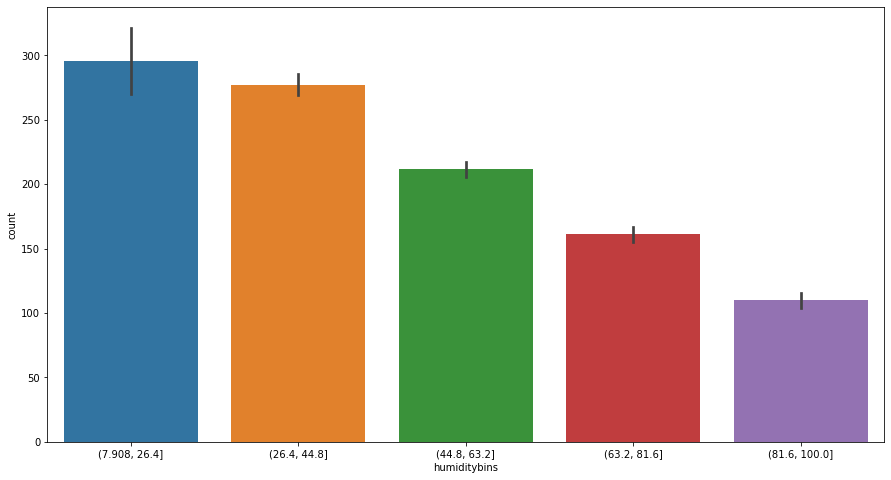

In [449]:
sns.barplot(x='humiditybins', y='count', data=data_train)

## Benchmark Model

In [450]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [452]:
y_train_log = np.log1p(y_train)

In [451]:
lr = LinearRegression().fit(X_train, y_train_log)

print("Coefficients:", lr.coef_)
print("Intercept   :", lr.intercept_)

print("train score :", lr.score(X_train, y_train_log))

Coefficients: [ 0.18938095 -0.0963132  -0.09554135  0.11743638  0.00536533  0.04939067
 -0.02599913  0.00868621]
Intercept   : 4.238817170425407
train score : 0.2631307919974998


## Feature Engineering

In [456]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [457]:
extract_date_info(X_train)

In [458]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,weekday,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,1,1,Saturday,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,1,1,Saturday,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,1,1,Saturday,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,1,1,Saturday,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,1,Saturday,4


#### Fill missing values

In [459]:
X_train['humidity'].replace(to_replace=0, 
                               value=np.mean([data_train.loc['2011-03-09']['humidity'].mean(), 
                                              data_train.loc['2011-03-11']['humidity'].mean()]), 
                               inplace=True)

In [460]:
#pipeline_emb = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')), ('oneHot', OneHotEncoder(sparse=True))])
#pipeline_fare = Pipeline(steps=[('impute', SimpleImputer(strategy='median')), ('scale', PowerTransformer())])

In [773]:
feature_eng = ColumnTransformer([
    #('pass', 'passthrough', ['temp']),
    ('encode', OneHotEncoder(drop='first'), ['season','weather', 'weekday', 'hour']),
    #('bins_5', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'), ['windspeed', 'humidity']),
    #('bins_10', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform'), ['temp']),
    ('poly_2', PolynomialFeatures(degree=2,include_bias=False,interaction_only=False), ['windspeed', 'humidity', 'temp']),
    #('poly_4', PolynomialFeatures(degree=9,include_bias=False,interaction_only=False), ['hour'])
]) 

In [774]:
feature_eng_matrix = feature_eng.fit_transform(X_train)

In [775]:
y_train.reset_index(drop=True, inplace=True)

## Train Model

In [776]:
lr = LinearRegression().fit(feature_eng_matrix, y_train_log)

print("Coefficients:", lr.coef_)
print("Intercept   :", lr.intercept_)

print("train score :", lr.score(feature_eng_matrix, y_train_log))

Coefficients: [ 2.53441941e-01  2.76092554e-01  4.44491183e-01 -1.67637271e-02
 -4.16032804e-01  2.88832205e-02 -1.45330353e-01  2.66054633e-02
 -7.65292762e-02 -7.77251593e-02 -1.42155699e-01 -1.25454404e-01
 -5.97681149e-01 -1.08336644e+00 -1.56159757e+00 -1.81833047e+00
 -8.61583880e-01  3.27111653e-01  1.28949007e+00  1.90020739e+00
  1.55480158e+00  1.20637804e+00  1.31202230e+00  1.49620731e+00
  1.46441352e+00  1.37989800e+00  1.43779662e+00  1.69950633e+00
  2.11571254e+00  2.02645436e+00  1.74128693e+00  1.44575896e+00
  1.19402351e+00  9.63566507e-01  5.73717921e-01  1.29453007e-02
  2.34884778e-02  1.16698057e-01 -2.64504977e-04 -2.78995903e-04
  2.75188398e-04 -1.91872013e-04 -1.33585382e-04 -1.84512809e-03]
Intercept   : 1.705794564218662
train score : 0.8114500660372225


## Optimize Hyperparameters / Cross-Validation

In [777]:
from sklearn.model_selection import cross_val_score

In [778]:
cross_val_score(estimator=lr, 
                X=feature_eng_matrix, 
                y=y_train_log,
                cv=5)

array([0.62627651, 0.76407541, 0.70780546, 0.7794463 , 0.75182501])

## Calculate test score = Submission to Kaggle